In [12]:
import matplotlib.pyplot as plt
import numpy as np

In [14]:
class bandit:
  def __init__(self,mu,sigma):
    #in this case each bandit nachine generate rewards randomly gaussian distributed with mean=mu and sd=sigma
    self.mu=mu
    self.sigma=sigma
    self.p_estimate=0
    self.n=0
  def pull(self):
    #this function generated our random rewards
    return np.random.normal(self.mu, self.sigma, 1)[0]
  def update(self,x):
    #this function update the estimated value of machine in each trial
    self.n+=1
    self.p_estimate=((self.n-1)*self.p_estimate+x)/self.n


In [15]:
def experiment_epsilon_greedy(n,e):
  #n:number of trials that we want the experiment will run
  num_trials=n
  #e:epsilon factor definition
  eps=e
  #our machines has mu=3,6,10 sigma=2,bandit init 
  bandits=[bandit(3,2),bandit(6,2),bandit(10,2)]
  rewards=np.zeros(num_trials)
  num_times_explored=0
  num_times_exploited=0
  num_optimal=0
  #optimal_j=np.argmax([bandit.mu for bandit in bandits])
  #print('optimal_j:' , optimal_j)
  for i in range(num_trials):
    if np.random.random()<eps:
      num_times_explored+=1
      j=np.random.randint(len(bandits))
    else:
      num_times_exploited+=1
      j=np.argmax([b.p_estimate for b in bandits])
    #if j ==optimal_j:
      #num_optimal+=1
    x=bandits[j].pull()
    rewards[i]=x
    bandits[j].update(x)
  for b in bandits:
    print('mean estimate ',b.p_estimate)
  print('total reward earned:',rewards.sum())
  print('overal win rate ',rewards.sum()/num_trials)
  print('num time explored :',num_times_explored)
  print('num time exploit:',num_times_exploited)

  cumulative_rewards=np.cumsum(rewards)
  win_rate=(cumulative_rewards/(np.arange(num_trials)+1))
  plt.plot(win_rate)
  #plt.plot(np.ones(num_trials)*np.max(bandit_prob))
  plt.show()

mean estimate  3.2101562679484377
mean estimate  5.551940964267872
mean estimate  9.946826353259754
total reward earned: 19119.416076714526
overal win rate  9.559708038357263
num time explored : 229
num time exploit: 1771


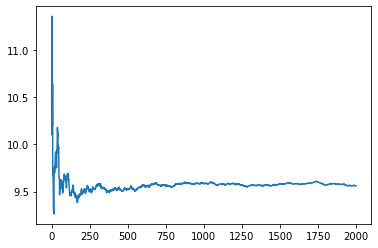

In [6]:
experiment_epsilon_greedy(2000,0.1)

In [16]:
def experiment_UCB(n,confidence_level):
  #n:number of trials that we want the experiment will run
  num_trials=n
  #our machines has mu=3,6,10 sigma=2,bandit init 
  bandits=[bandit(3,2),bandit(6,2),bandit(10,2)]
  rewards=np.zeros(num_trials)
  num_times_explored=0
  num_times_exploited=0
  num_optimal=0
  #optimal_j=np.argmax([bandit.mu for bandit in bandits])
  #print('optimal_j:' , optimal_j)
  for i in range(num_trials):
    j=np.argmax([((b.p_estimate)+confidence_level * (np.sqrt(np.log(i) / b.n))) for b in bandits])
    #if j ==optimal_j:
      #num_optimal+=1
    x=bandits[j].pull()
    rewards[i]=x
    bandits[j].update(x)
  for b in bandits:
    print('mean estimate ',b.p_estimate)
  print('total reward earned:',rewards.sum())
  print('overal win rate ',rewards.sum()/num_trials)
  print('num time explored :',num_times_explored)
  print('num time exploit:',num_times_exploited)

  cumulative_rewards=np.cumsum(rewards)
  win_rate=(cumulative_rewards/(np.arange(num_trials)+1))
  plt.plot(win_rate)
  #plt.plot(np.ones(num_trials)*np.max(bandit_prob))
  plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in log
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in sqrt
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in double_scalars
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in double_scalars
  del sys.path[0]


mean estimate  3.196590682377662
mean estimate  4.881681765576979
mean estimate  9.99016453710113
total reward earned: 19917.395399382705
overal win rate  9.958697699691353
num time explored : 0
num time exploit: 0


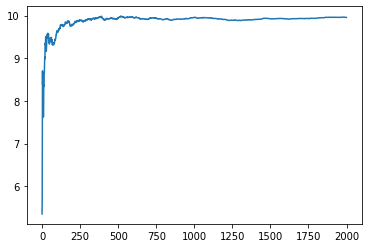

In [18]:
experiment_UCB(2000,5)